In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

def collect_losses(root_dir):
    depth=3

    results = dict()
    
    results["en"] = defaultdict(list)
    results["it"] = defaultdict(list)

    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) == depth:
            for file_ in files:
                if file_ == "all_results.json":
                    
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)

                    names = subdir.split(os.sep)
                    seed = names[-2]
                    mode = names[-3]
                    lang = names[-1].split("_")[-1]

                    # print(f"{mode} - {lang} | MSE {d['eval_mse']} - R2 {d['eval_r2']} (seed : {seed})")

                    results[lang][f"{mode}_MSE"].append(d['eval_mse'])
                    results[lang][f"{mode}_R2"].append(d['eval_r2'])
                    
    # for lang, ress in results.items():
    #     for k, v in results[lang].items():
    #         results[lang][k] = v/2

    
    en_r2s = dict()
    en_mses = dict()
    

    for k, v in results['en'].items():
        key_splitted = k.split("_")
        if "MSE" in key_splitted:
            en_mses["_".join(key_splitted[:-1])] = v
        else:
            en_r2s["_".join(key_splitted[:-1])] = v

    it_r2s = dict()
    it_mses = dict()
    

    for k, v in results['it'].items():
        key_splitted = k.split("_")
        if "MSE" in key_splitted:
            it_mses["_".join(key_splitted[:-1])] = v
        else:
            it_r2s["_".join(key_splitted[:-1])] = v

    return en_mses, en_r2s, it_mses, it_r2s

In [3]:
# old version ---
def plot_comp_res(results):    
    plt.rcParams["figure.figsize"] = (10,5)

    r2s = dict()
    mses = dict()
    

    for k, v in results.items():
        key_splitted = k.split("_")
        if "MSE" in key_splitted:
            mses["_".join(key_splitted[:-1])] = v
        else:
            r2s["_".join(key_splitted[:-1])] = v
    
    
    print("MSE s")
    
    for i, (k, v) in enumerate(mses.items()):
        plt.scatter(0, v, label=k, s=(len(r2s.items()) - i)*15)

    plt.ylabel("MSE")
    plt.legend()
    plt.show()
    
    
    print("R2 s")

    for i, (k, v) in enumerate(r2s.items()):
        plt.scatter(0, v, label=k, s=(len(r2s.items()) - i)*15)

    plt.ylabel("R2")
    plt.legend()
    plt.show()
# ---

In [38]:
def preprocess_key(k):
    splitted = k.split("_")
    
    return "\n".join(splitted)

def plot_errorbar(dict_to_plot, label):
    x = []
    y = []
    e = []
    
    for k, v in dict_to_plot.items():
        
        x.append(preprocess_key(k))
        y.append(np.mean(v))
        e.append(np.std(v))
        
    plt.errorbar(x, y, e, linestyle='None', fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10)
    plt.ylabel(label, fontsize=16)
    
    plt.show()


def plot_comp_res(mses, r2s):    
    plt.rcParams["figure.figsize"] = (10,5)
    
    plot_errorbar(mses, "MSE")
    plot_errorbar(r2s, "R2")
    

def process_to_present(df_res):
    s = df_res.style
    s.format(na_rep='MISS', precision=2)
    df_res.index = [" ".join(idx.split("_")) for idx in list(df_res.index)]
    print(s.to_latex(column_format='lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}'))
    # print(s.to_latex())

In [39]:
en_mses, en_r2s, it_mses, it_r2s = collect_losses("../finetuning_comp3")

In [40]:
print("EN MSEs mean")
print({k: np.mean(v) for k, v in en_mses.items()})
print("EN R2s mean")
print({k: np.mean(v) for k, v in en_r2s.items()})
print("IT MSEs mean")
print({k: np.mean(v) for k, v in it_mses.items()})
print("IT R2s mean")
print({k: np.mean(v) for k, v in it_r2s.items()})

df_res = pd.DataFrame([
    {k: np.mean(v) for k, v in en_mses.items()},
    {k: np.mean(v) for k, v in en_r2s.items()},
    {k: np.mean(v) for k, v in it_mses.items()},
    {k: np.mean(v) for k, v in it_r2s.items()}
])

df_res.index = ["EN MSEs mean", "EN R2s mean", "IT MSEs mean", "IT R2s mean"]

EN MSEs mean
{'notpretraining_finetuned': 0.23918714821338655, 'notpretraining_finetuned_prob_skip': 0.3346076399087906, 'pretraining_finetuned_prob_skip': 0.21630342900753022, 'notpretraining_finetuned_dur': 0.26370680034160615, 'pretraining_finetuned_dur': 0.21411883234977722, 'pretraining_finetuned': 0.21513719260692596, 'notpretraining': 0.2577724367380142, 'pretraining': 0.20622758865356444}
EN R2s mean
{'notpretraining_finetuned': 0.6619573989596187, 'notpretraining_finetuned_prob_skip': 0.5392404939977469, 'pretraining_finetuned_prob_skip': 0.6935152941931044, 'notpretraining_finetuned_dur': 0.6262395993019941, 'pretraining_finetuned_dur': 0.7000368708122038, 'pretraining_finetuned': 0.6986659423128451, 'notpretraining': 0.6369698417081384, 'pretraining': 0.7082904872708831}
IT MSEs mean
{'notpretraining_finetuned': 0.3643935203552246, 'notpretraining_finetuned_prob_skip': 0.3434441387653351, 'pretraining_finetuned_prob_skip': 0.3101790249347687, 'notpretraining_finetuned_dur': 

In [41]:
df_res.T

,EN MSEs mean,EN R2s mean,IT MSEs mean,IT R2s mean
notpretraining_finetuned,0.239187,0.661957,0.364394,0.583948
notpretraining_finetuned_prob_skip,0.334608,0.539240,0.343444,0.608760
pretraining_finetuned_prob_skip,0.216303,0.693515,0.310179,0.647897
notpretraining_finetuned_dur,0.263707,0.626240,0.351406,0.598092
pretraining_finetuned_dur,0.214119,0.700037,0.341810,0.608953
pretraining_finetuned,0.215137,0.698666,0.332311,0.623447
notpretraining,0.257772,0.636970,0.373741,0.573364
pretraining,0.206228,0.708290,0.310419,0.646066


In [42]:
process_to_present(df_res.T)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & EN MSEs mean & EN R2s mean & IT MSEs mean & IT R2s mean \\
notpretraining finetuned & 0.24 & 0.66 & 0.36 & 0.58 \\
notpretraining finetuned prob skip & 0.33 & 0.54 & 0.34 & 0.61 \\
pretraining finetuned prob skip & 0.22 & 0.69 & 0.31 & 0.65 \\
notpretraining finetuned dur & 0.26 & 0.63 & 0.35 & 0.60 \\
pretraining finetuned dur & 0.21 & 0.70 & 0.34 & 0.61 \\
pretraining finetuned & 0.22 & 0.70 & 0.33 & 0.62 \\
notpretraining & 0.26 & 0.64 & 0.37 & 0.57 \\
pretraining & 0.21 & 0.71 & 0.31 & 0.65 \\
\end{tabular}



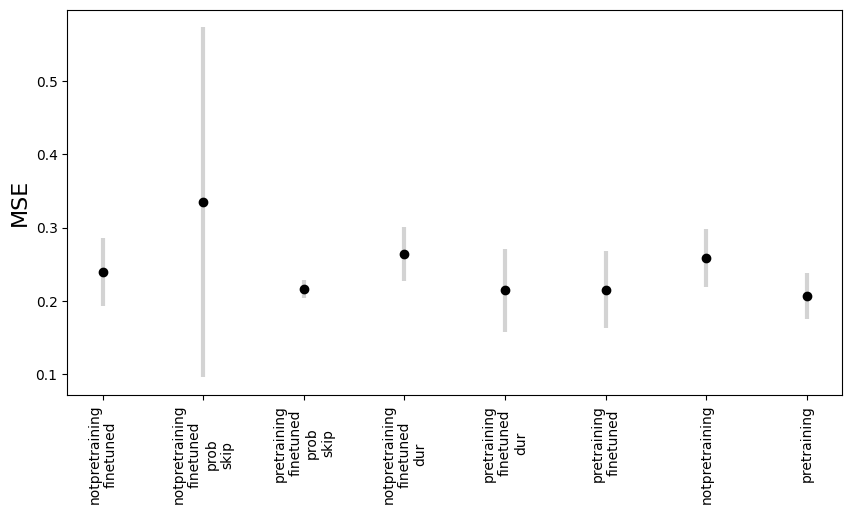

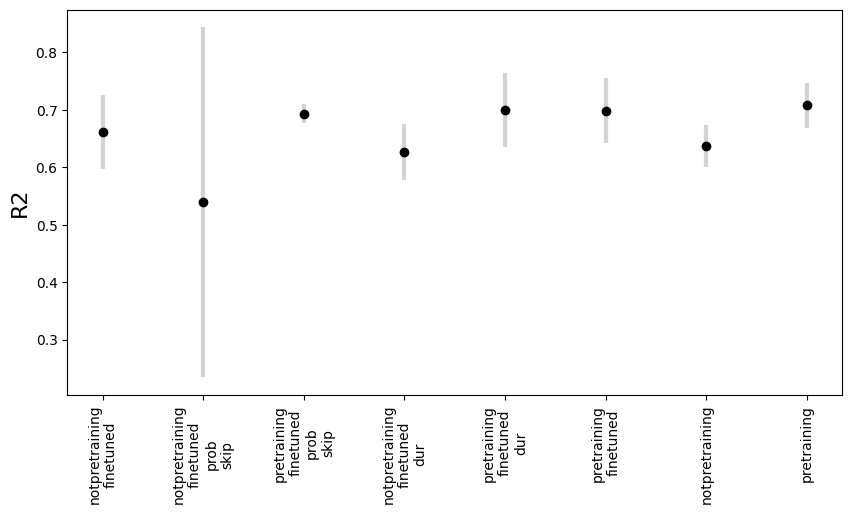

In [43]:
plot_comp_res(en_mses, en_r2s)

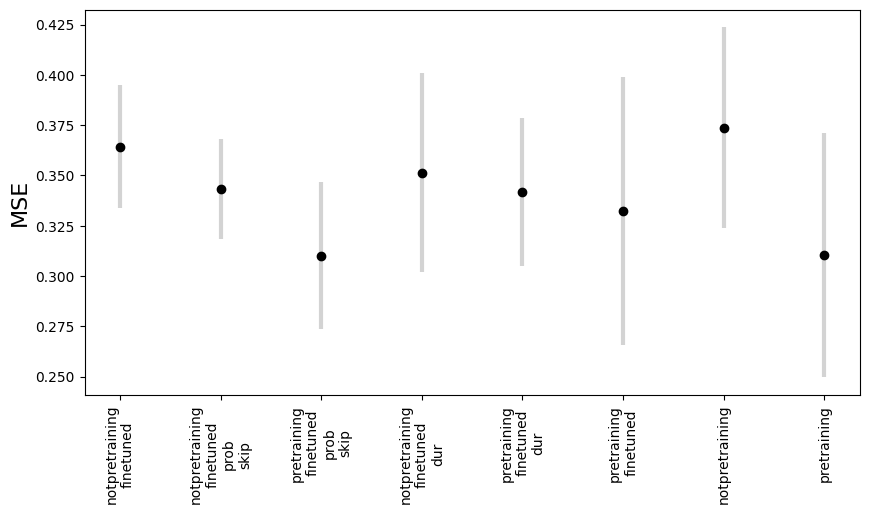

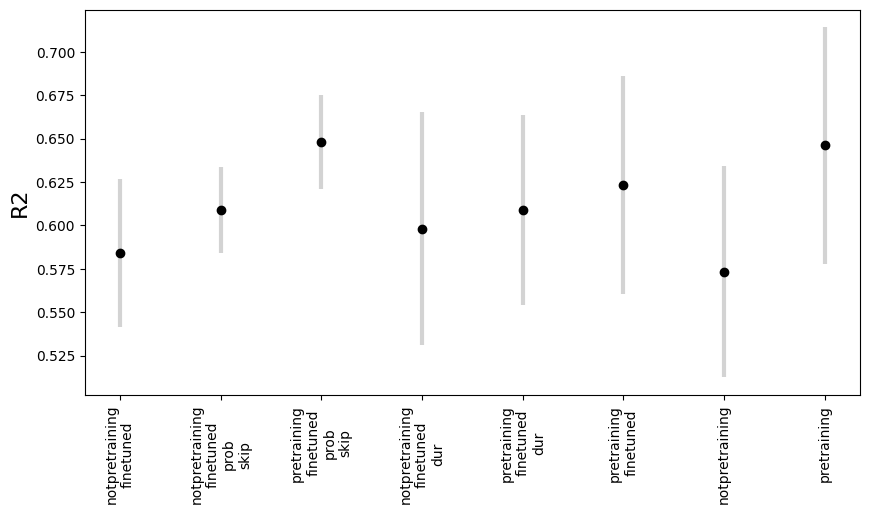

In [44]:
plot_comp_res(it_mses, it_r2s)